# Prental depression exposure and hair cortisol at age 6


Hello there, here is a little playgroung for exploring the relationship between prenatal exposure to depression and a hair cortisol in 6 year-old children from the Generation R study (https://generationr.nl/). 


##### First, let's get the dependencies we need

In [12]:
# getting to the data
import os.path
import pyreadr

# data storage and handling
import pandas as pd; import numpy as np;

# plotting
import matplotlib.pyplot as plt; 
import seaborn as sns; sns.set(style="whitegrid",font_scale=2)
import ptitprince as pt
%matplotlib inline

# ignore warnings 
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Point to the raw data
pathtodata = input("Enter the path to data: ")

# /Users/Serena/Desktop/CortisolData/

if os.path.exists(pathtodata) == False:
    pathtodata = input("Not quite, try again: ")

Enter the path to data: /Users/Serena/Desktop/CortisolData/


In [8]:
file = pyreadr.read_r(pathtodata + 'dataset_raw.Rds') # also works for RData

# done! 
# result is a dictionary where keys are the name of objects and the values python
# objects. In the case of Rds there is only one object with None as key
df = file[None] # extract the pandas data frame 
df.idc = pd.to_numeric(df.idc, downcast = 'integer')
df.index = df.idc
data = df.drop(['idc'], axis = 1)

In [9]:
data

,idm,bsiScore,bsiScoreFlg,gender,ethnfv2,educm,income5,twin,mother,parity,...,j0700103,j0800103,j0900103,j1000103,j1100103,j1200103,familySS,childAge,cortisol,lncortisol
idc,,,,,,,,,,,,,,,,,,,,,
16,15.0,0.166667,0.0,1.0,7.0,3.0,4.0,0.0,15.0,0.0,...,4.0,1.0,4.0,1.0,4.0,1.0,NaN,8.553046,4.315749,1.462271
96,107.0,1.000000,1.0,2.0,2.0,4.0,2.0,0.0,107.0,0.0,...,4.0,NaN,3.0,2.0,4.0,2.0,NaN,8.462697,1.120439,0.113720
102,112.0,0.000000,0.0,1.0,5.0,3.0,3.0,0.0,112.0,1.0,...,4.0,2.0,3.0,2.0,4.0,2.0,3.416667,8.974675,4.420153,1.486174
114,124.0,0.000000,0.0,1.0,1.0,5.0,11.0,0.0,124.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.049281,0.285035,-1.255142
117,127.0,0.000000,0.0,1.0,1.0,4.0,NaN,0.0,127.0,0.0,...,4.0,1.0,4.0,1.0,4.0,1.0,3.750000,9.119781,0.428023,-0.848578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9834,10397.0,NaN,NaN,2.0,4.0,1.0,5.0,0.0,9685.0,NaN,...,4.0,1.0,4.0,1.0,4.0,1.0,4.000000,5.916496,2.193807,0.785639
9843,1091.0,NaN,NaN,2.0,7.0,1.0,NaN,0.0,1094.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.334018,1.666723,0.510860
9844,3880.0,NaN,NaN,1.0,3.0,2.0,NaN,0.0,3884.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.724162,0.860514,-0.150226


<h3><center>Ok, let the plotting begin!</center></h3>

#### FANCY RAIN PLOTS 

In [18]:
g = data[['lncortisol', 'childRaceEth', 'bsiScoreFlg']]
g.shape

(2671, 3)

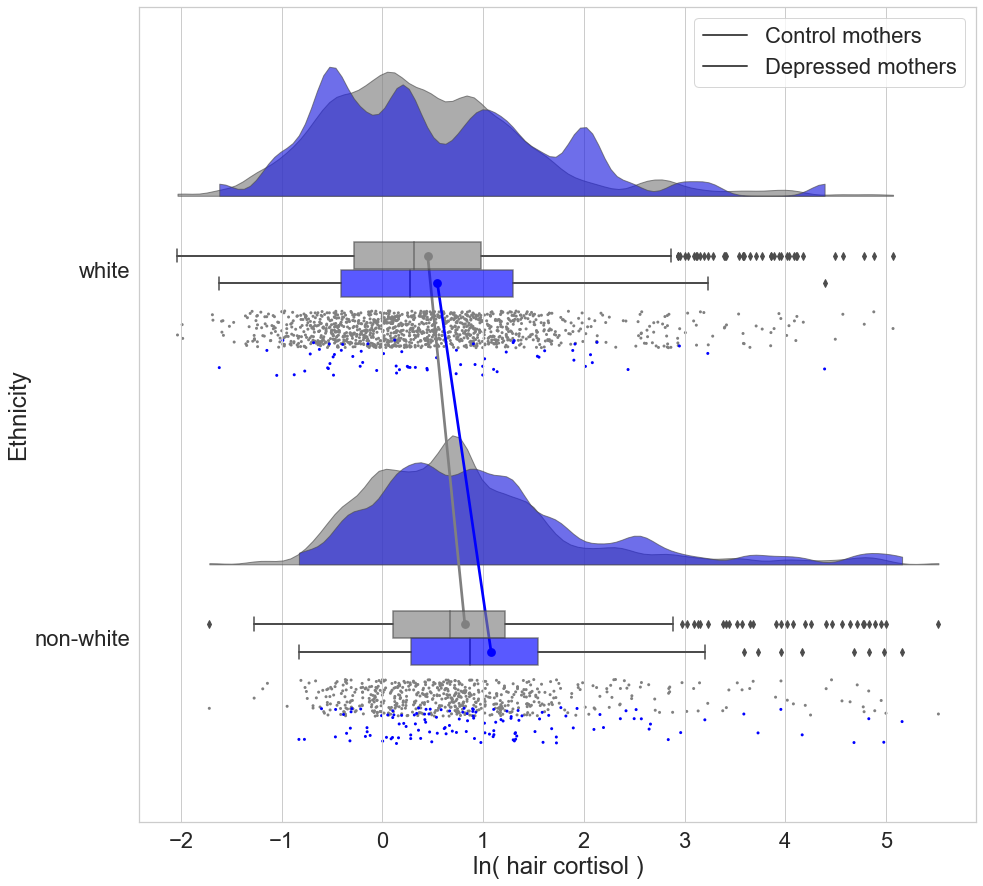

In [55]:
ort = "h"; pal = ['grey','blue']; sigma = .12

f, ax = plt.subplots(figsize=(15, 15))

ax = pt.RainCloud(x = g["childRaceEth"], y = g["lncortisol"], 
                  hue = g["bsiScoreFlg"], 
                  data = g, palette = pal, bw = sigma,
                 width_viol = .7, ax = ax, orient = ort, alpha = .65, 
                  dodge = True, pointplot = True, move = .2)

ax.legend(['Control mothers', 'Depressed mothers'])
ax.set_yticklabels(['white', 'non-white'])
ax.set_ylabel("Ethnicity"); ax.set_xlabel("ln( hair cortisol )"); 

plt.savefig("rainplot",dpi = 300, edgecolorcolor = "white", 
            facecolor = "white", pad_inches=0.1, frameon=True)

#### SCATTERPLOTS

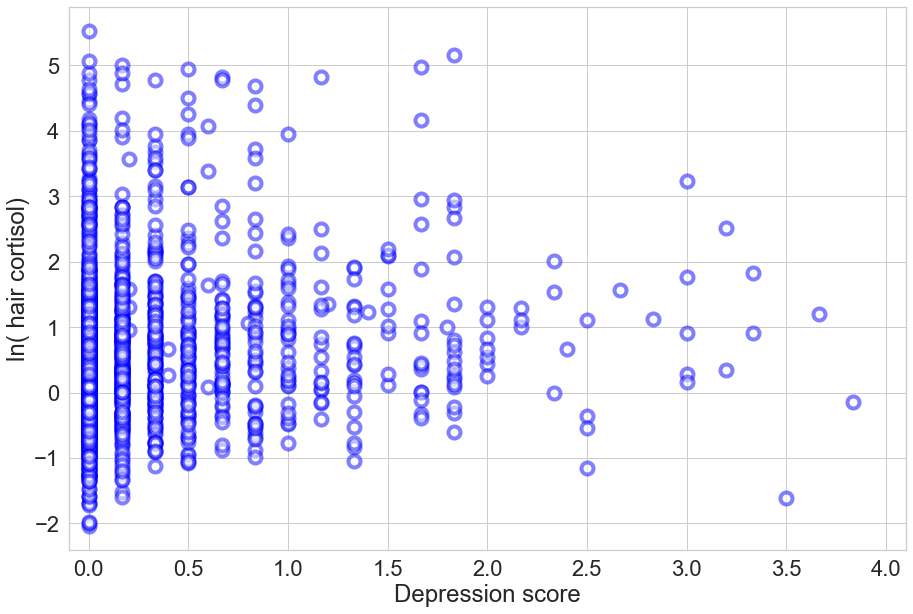

In [54]:
f, ax2 = plt.subplots(figsize=(15, 10))

ax2 = plt.plot(data['bsiScore'], data['lncortisol'], 'o', color = "blue", 
             markersize=12, markerfacecolor='white', markeredgecolor='blue',
               markeredgewidth=4, alpha = 0.5)
plt.xlim(-0.1, 4.1)
plt.ylabel("ln( hair cortisol)"); plt.xlabel("Depression score")

plt.savefig("scatterplot", dpi = 300, edgecolorcolor = "white", 
            facecolor = "white", pad_inches=0.1, frameon=True)